#### sklearn.preprocessing.PolynomialFeatures
* class sklearn.preprocessing.PolynomialFeatures(degree=2, *, interaction_only=False, include_bias=True, order='C'

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

def polynomial_func(X):
    y= 1+ 2*X + X**2 + X**3
    return y 

X= np.arange(4).reshape(2,2)
y= polynomial_func(X)
print(X)
print(y)



poly=PolynomialFeatures(3)
poly_ftr =poly.fit_transform(X)
print(poly_ftr)
model=LinearRegression()
model.fit(poly_ftr,y)
print(np.round(model.coef_,2))
print(model.coef_.shape)

[[0 1]
 [2 3]]
[[ 1  5]
 [17 43]]
[[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
[[0.   0.02 0.02 0.05 0.07 0.1  0.1  0.14 0.22 0.31]
 [0.   0.06 0.06 0.11 0.17 0.23 0.23 0.34 0.51 0.74]]
(2, 10)


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

model = Pipeline([
    ('poly', PolynomialFeatures(3)),
    ('linear', LinearRegression())
])
#파이프라인. 폴리노미널 3차를 리니어 모델을 한꺼번에 돌린 것. 

model = model.fit(X,y)
print( np.round(model.named_steps['linear'].coef_,2))
#파이프라인 모델내에 있는 linear에서 .coef_를 불러와라. 

[[0.   0.02 0.02 0.05 0.07 0.1  0.1  0.14 0.22 0.31]
 [0.   0.06 0.06 0.11 0.17 0.23 0.23 0.34 0.51 0.74]]


In [10]:
model.named_steps

{'poly': PolynomialFeatures(degree=3), 'linear': LinearRegression()}

In [11]:
model.named_steps['linear']

LinearRegression()

In [13]:
model.named_steps['linear'].coef_

array([[0.        , 0.02402402, 0.02402402, 0.04804805, 0.07207207,
        0.0960961 , 0.0960961 , 0.14414414, 0.21621622, 0.31231231],
       [0.        , 0.05705706, 0.05705706, 0.11411411, 0.17117117,
        0.22822823, 0.22822823, 0.34234234, 0.51351351, 0.74174174]])

#### Boston price regression

In [14]:
import pandas as pd
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston_df = pd.read_csv('./datasets/boston_housing.csv' , header=None , delimiter=r"\s+" , names=column_names)
boston_df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7


In [18]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

y_target = boston_df['MEDV']
x_data = boston_df.drop(['MEDV'],axis=1,inplace=False)
x_tr,x_test,y_tr,y_test = train_test_split(x_data, y_target, test_size=0.3, random_state=1)

lr= LinearRegression()
lr.fit(x_tr,y_tr)
y_pred=lr.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(mse, r2)
print(lr.intercept_)
print(lr.coef_)

19.831323672063046 0.7836295385076302
46.39649387182381
[-9.85424717e-02  6.07841138e-02  5.91715401e-02  2.43955988e+00
 -2.14699650e+01  2.79581385e+00  3.57459778e-03 -1.51627218e+00
  3.07541745e-01 -1.12800166e-02 -1.00546640e+00  6.45018446e-03
 -5.68834539e-01]


In [19]:
# polynomial 적용
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

model = Pipeline([
    ('poly', PolynomialFeatures(2 , include_bias=False)),
    ('linear', LinearRegression())
])

model

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('linear', LinearRegression())])

In [20]:


model = model.fit(x_tr,y_tr)

y_pred=model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(mse, r2)
print(lr.intercept_)
print(lr.coef_)

17.929414739119053 0.8043803930820662
46.39649387182381
[-9.85424717e-02  6.07841138e-02  5.91715401e-02  2.43955988e+00
 -2.14699650e+01  2.79581385e+00  3.57459778e-03 -1.51627218e+00
  3.07541745e-01 -1.12800166e-02 -1.00546640e+00  6.45018446e-03
 -5.68834539e-01]


In [21]:
# polynomial 적용
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

model = Pipeline([
    ('poly', PolynomialFeatures(3 , include_bias=False)),
    ('linear', LinearRegression())
])

model = model.fit(x_tr,y_tr)

y_pred=model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(mse, r2)
print(lr.intercept_)
print(lr.coef_)

30364.45288401638 -330.29259509456
46.39649387182381
[-9.85424717e-02  6.07841138e-02  5.91715401e-02  2.43955988e+00
 -2.14699650e+01  2.79581385e+00  3.57459778e-03 -1.51627218e+00
  3.07541745e-01 -1.12800166e-02 -1.00546640e+00  6.45018446e-03
 -5.68834539e-01]


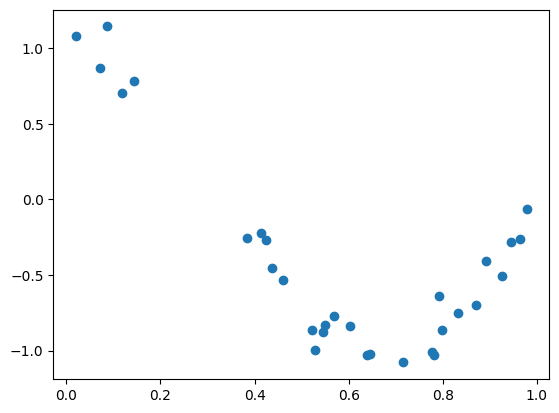

<Figure size 1400x500 with 0 Axes>

In [23]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import cross_val_score 
%matplotlib inline 

def true(x):
    return np.cos(1.5 * np.pi*x)

np.random.seed(0)
n_samples = 30 
x= np.sort(np.random.rand(n_samples))
y= true(x) + np.random.randn(n_samples)*0.1

plt.scatter(x,y)

plt.figure(figsize=(14,5))




1 [-2.]
1 0.4077289625098685
4 [  0. -18.  24.  -7.]
4 0.04320874987232056
15 [-2.98300000e+03  1.03899000e+05 -1.87415300e+06  2.03715470e+07
 -1.44872830e+08  7.09313489e+08 -2.47065245e+09  6.24559902e+09
 -1.15676336e+10  1.56894743e+10 -1.54005873e+10  1.06457184e+10
 -4.91377255e+09  1.35919593e+09 -1.70380747e+08]
15 181238260.14863485


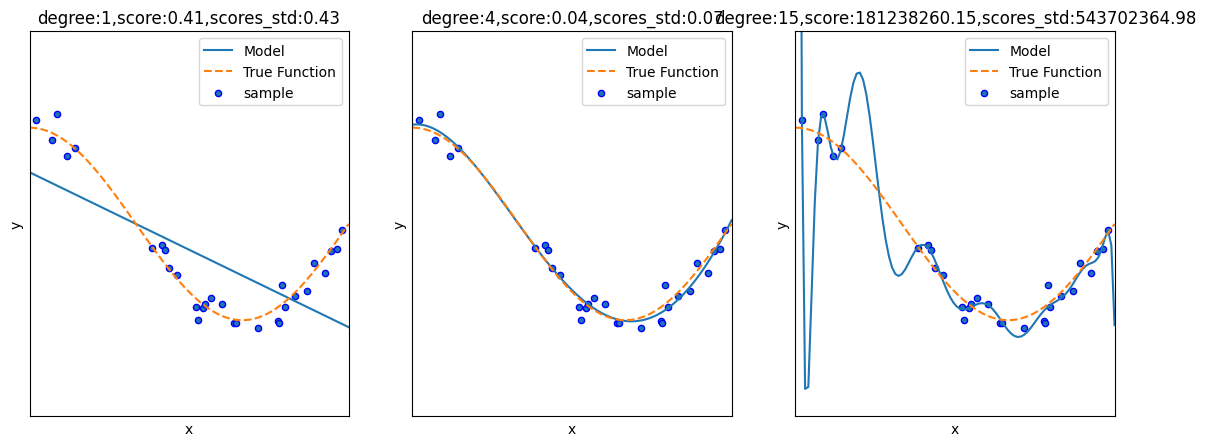

In [25]:
degrees= [1,4,15]
plt.figure(figsize=(14,5))
for i in range(len(degrees)):
    ax = plt.subplot(1,len(degrees), i+1) 
    plt.setp(ax,xticks=(), yticks=())

    poly = PolynomialFeatures(degree =degrees[i], include_bias=False)
    lr=LinearRegression()
    pipeline = Pipeline([
        ('poly', poly),
        ('lr', lr)
    ])
    
    pipeline.fit(x.reshape(-1,1),y)

    scores = cross_val_score(pipeline, x.reshape(-1,1), y, scoring='neg_mean_squared_error', cv=10)
    coeff = pipeline.named_steps['lr'].coef_
    print(degrees[i], np.round(coeff))
    print(degrees[i], -1*np.mean(scores))

    x_test = np.linspace(0,1,100)

    plt.plot(x_test, pipeline.predict(x_test[:, np.newaxis]),label='Model')
    plt.plot(x_test, true(x_test),'--',label = 'True Function')
    plt.scatter(x,y, edgecolors='b', s=20, label='sample')

    plt.xlabel('x'); plt.ylabel('y'); plt.xlim((0,1)); plt.ylim((-2,2)); plt.legend(loc='best')
    plt.title(f'degree:{degrees[i]},score:{-scores.mean():.2f},scores_std:{scores.std():.2f}') 

plt.show()